# Домашнее задание по дисциплине «машинное обучение» 2023 год.
# Екатерина Шмакова, группа 5030103/00301.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
from random import choice
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Загрузка данных

In [2]:
data = pd.read_json('data.json')
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


Первый столбец — id, имеет целочисленный тип данных.\
Второй столбец — cuisine, имеет строковый тип данных, является переменной, которую мы будем предсказывать.\
Третий столбец — ingredients, имеет тип данных список.\
В данном формате данных не получится обучить модель.

In [4]:
data.isna().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [5]:
data.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

Пропусков в данных нет.

Для того, чтобы можно было обучить модель предлагается сделать One-hot-encoding.\
Сначала можно найти все ингердиенты, которые встречаются в рецептах, затем создать колонки с названиями, которые соответствуют ингредиентам, если ингредиент есть в строке с id рецепта, то поставим в данную ячейку значение 1, в противном случае поставим в ячейку значение 0.

In [6]:
ingredients_unique = []
for i in range(data.shape[0]):
    ingredients_unique.extend(data.loc[i, 'ingredients'])
ingredients_unique = list(set(ingredients_unique))   

In [7]:
len(ingredients_unique)

6714

Получили, что всего 6714 уникальных ингредиентов. Таким образом к нашему dataframe добавим 6714 колонок с нулей.

In [8]:
ingredients_unique = pd.DataFrame(0, index=data.index, columns=ingredients_unique)
ingredients_unique

,vegetable demi-glace,blanco chees queso,"frozen chopped spinach, thawed and squeezed dry",plain breadcrumbs,cactus pad,cheddar cheese,yellow summer squash,kidney,all purpose unbleached flour,sweetened coconut flakes,...,fresh tomatoes,raspberry vinegar,five-spice powder,katsuo bushi,red bean paste,tortilla shells,condensed cream of broccoli soup,methi leaves,dried strawberries,powdered sugar icing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = pd.concat([data, ingredients_unique], axis=1)

In [10]:
data

,id,cuisine,ingredients,vegetable demi-glace,blanco chees queso,"frozen chopped spinach, thawed and squeezed dry",plain breadcrumbs,cactus pad,cheddar cheese,yellow summer squash,...,fresh tomatoes,raspberry vinegar,five-spice powder,katsuo bushi,red bean paste,tortilla shells,condensed cream of broccoli soup,methi leaves,dried strawberries,powdered sugar icing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
for i, row in enumerate(data['ingredients']):
    for ingredient in row:
        data.loc[i, ingredient] = 1

In [12]:
data

,id,cuisine,ingredients,vegetable demi-glace,blanco chees queso,"frozen chopped spinach, thawed and squeezed dry",plain breadcrumbs,cactus pad,cheddar cheese,yellow summer squash,...,fresh tomatoes,raspberry vinegar,five-spice powder,katsuo bushi,red bean paste,tortilla shells,condensed cream of broccoli soup,methi leaves,dried strawberries,powdered sugar icing
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data.loc[4, 'shallots']

1

In [14]:
data.loc[39770, 'KRAFT Zesty Italian Dressing']

1

In [15]:
data.loc[39770, 'shallots']

0

Также создадим новую колонку с длиной рецепта.

In [16]:
data['recipe_length'] = data.drop(columns=['id', 'cuisine', 'ingredients']).sum(axis=1)

Ещё можно убрать колонки id, ingredients, так как id не несёт никакого информационного смысла, а ingredients был закодирован с помощью One-hot-encoding.

In [17]:
data.drop(columns=['id', 'ingredients'], inplace=True)

One-hot-encoding был выполнен, теперь можно удобно проанализировать таблицу и обучать модель.

In [18]:
data

,cuisine,vegetable demi-glace,blanco chees queso,"frozen chopped spinach, thawed and squeezed dry",plain breadcrumbs,cactus pad,cheddar cheese,yellow summer squash,kidney,all purpose unbleached flour,...,raspberry vinegar,five-spice powder,katsuo bushi,red bean paste,tortilla shells,condensed cream of broccoli soup,methi leaves,dried strawberries,powdered sugar icing,recipe_length
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39770,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
39771,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39772,chinese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


## Анализ данных

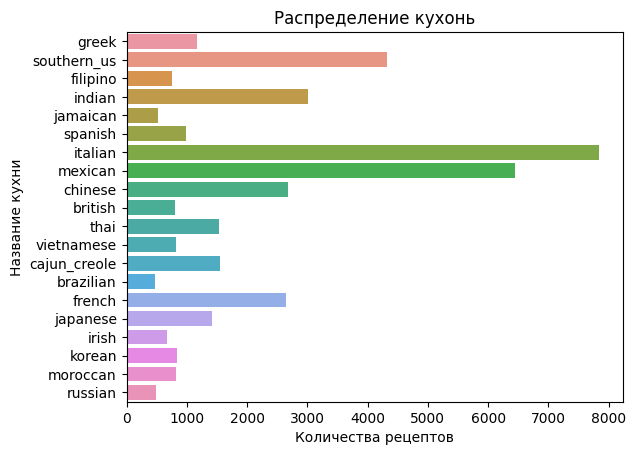

In [19]:
plt.title('Распределение кухонь')
seaborn.countplot(data, y='cuisine')
plt.xlabel('Количества рецептов')
plt.ylabel('Название кухни')
plt.show()

Распределение не является равномерным, это может плохо повлиять на качество модели, так как при обучении желательно, чтобы предсказываемая переменная была распределена равномерно.

In [20]:
data['cuisine'].nunique()

20

Всего видов кухонб 20, значит это будет задача классификации на 20 классов.\
Также построим график среднего количества ингредиентов в рецепте по каждой кухне.

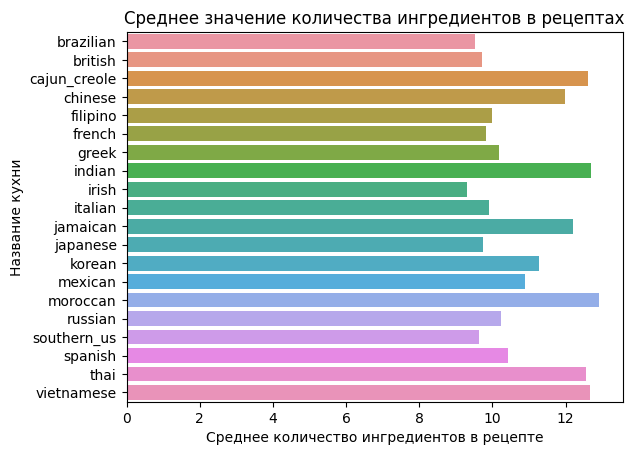

In [21]:
plt.title('Среднее значение количества ингредиентов в рецептах')
seaborn.barplot(data=data.groupby('cuisine').agg({'recipe_length': 'mean'}).reset_index(), x='recipe_length', y='cuisine')
plt.xlabel('Среднее количество ингредиентов в рецепте')
plt.ylabel('Название кухни')
plt.show()

Также посмотрим самые популярные ингредиенты.

In [22]:
popular_ingredients_df = data.drop(columns=['cuisine', 'recipe_length']).sum(axis=0).sort_values(ascending=False).head(25)
popular_ingredients_df = pd.DataFrame({'ingredient': popular_ingredients_df.index, 'count': popular_ingredients_df.values})

In [23]:
popular_ingredients_df

,ingredient,count
0,salt,18048
1,onions,7972
2,olive oil,7971
3,water,7457
4,garlic,7380
5,sugar,6434
6,garlic cloves,6236
7,butter,4847
8,ground black pepper,4784
9,all-purpose flour,4632


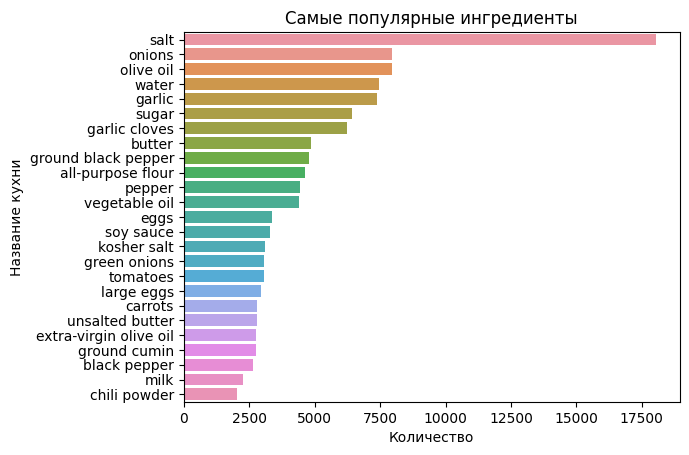

In [24]:
plt.title('Самые популярные ингредиенты')
seaborn.barplot(data=popular_ingredients_df, x='count', y='ingredient')
plt.xlabel('Количество')
plt.ylabel('Название кухни')
plt.show()

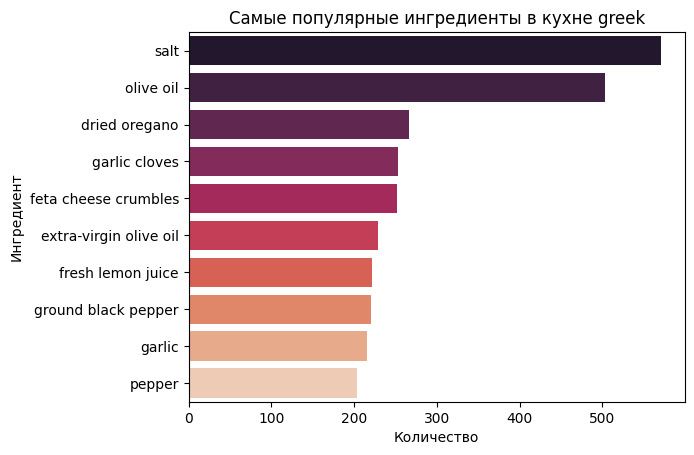

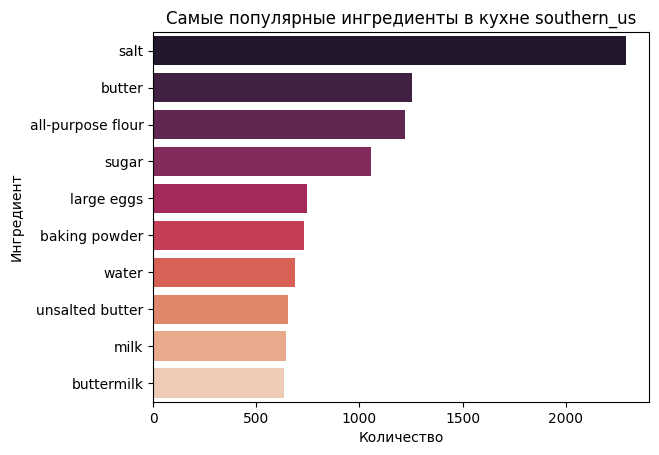

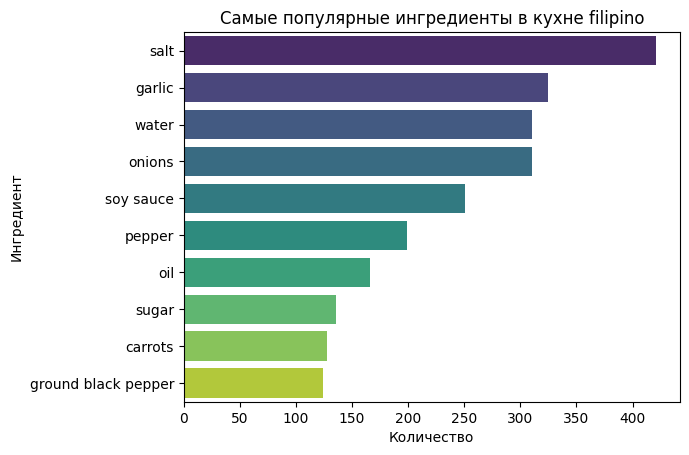

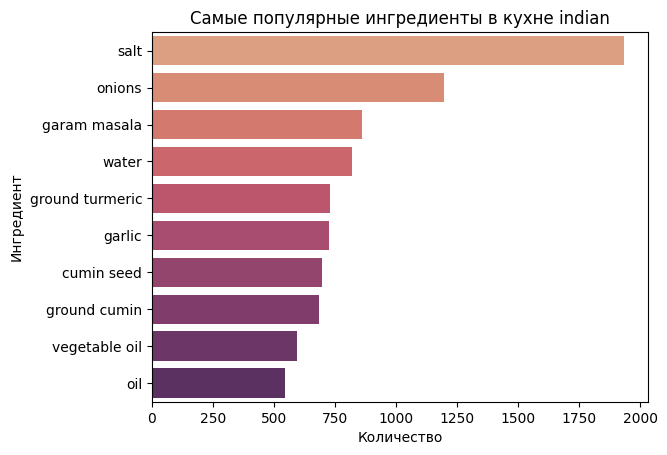

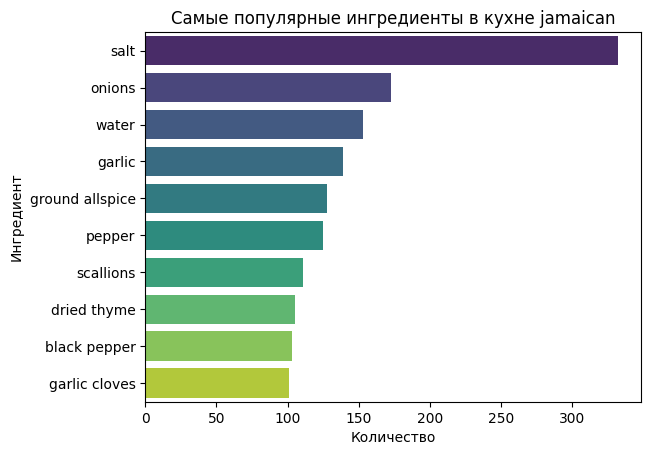

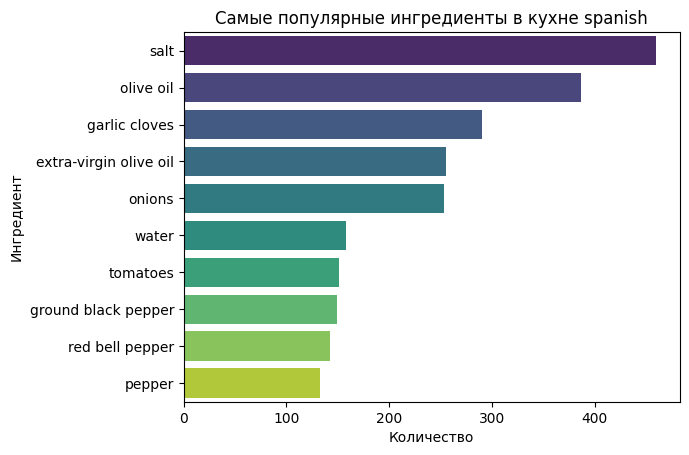

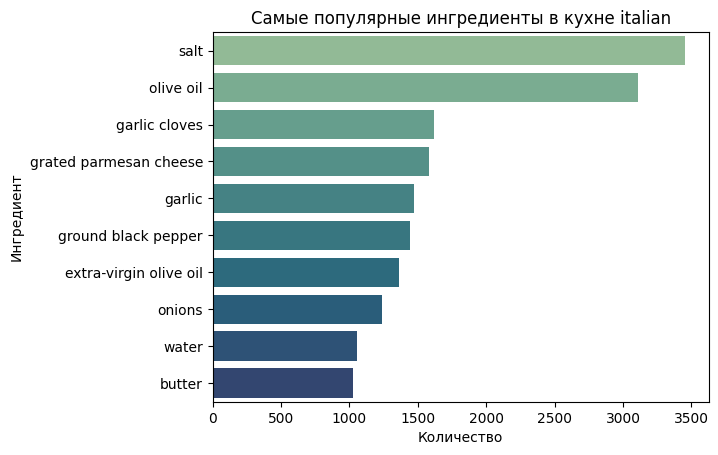

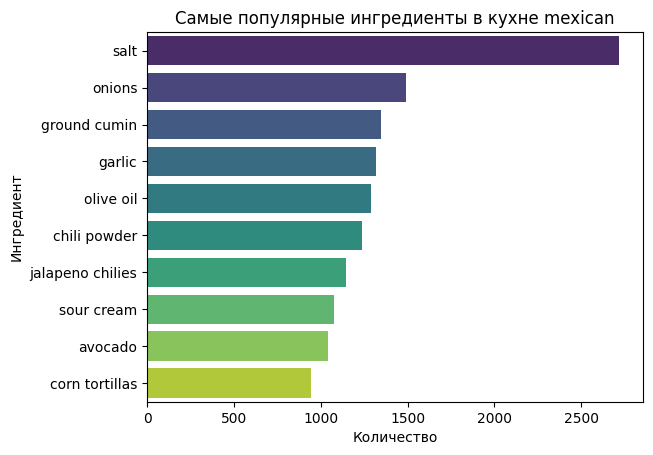

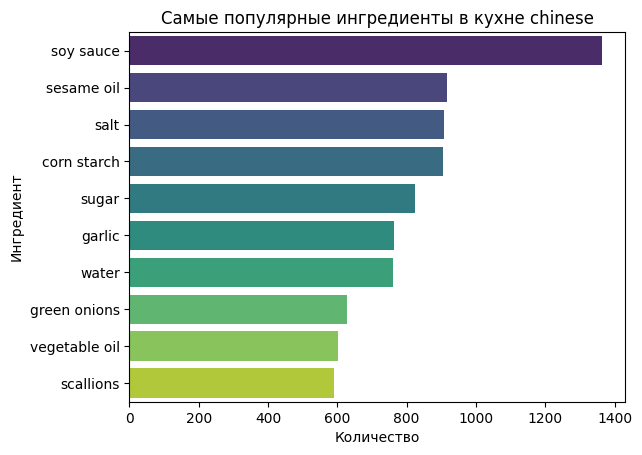

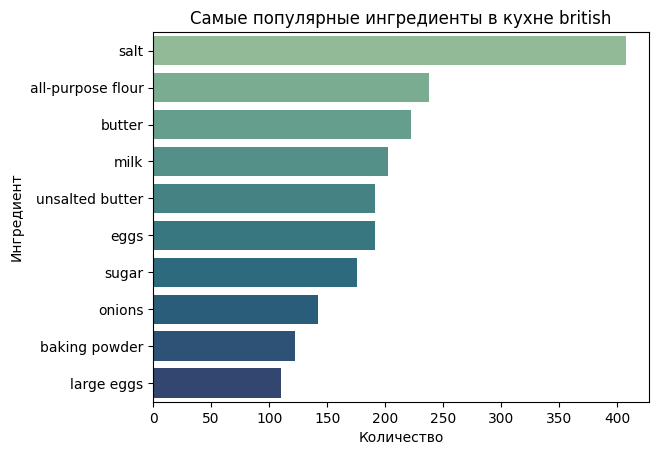

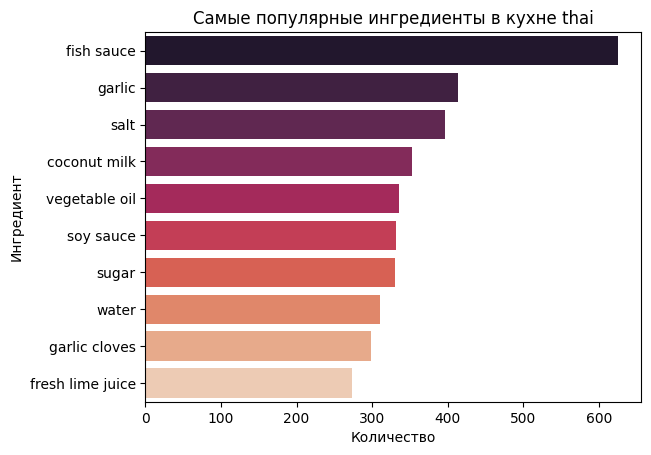

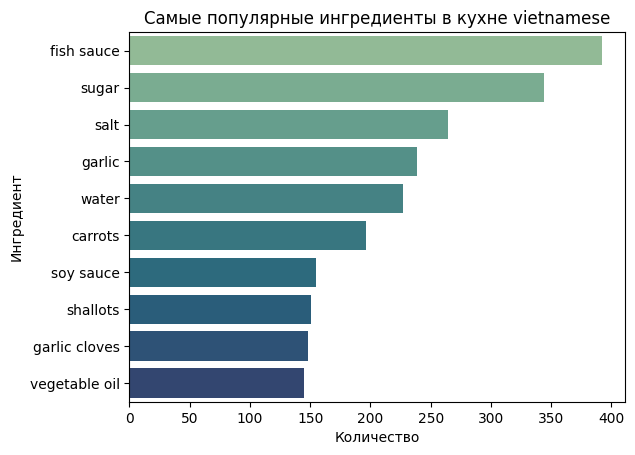

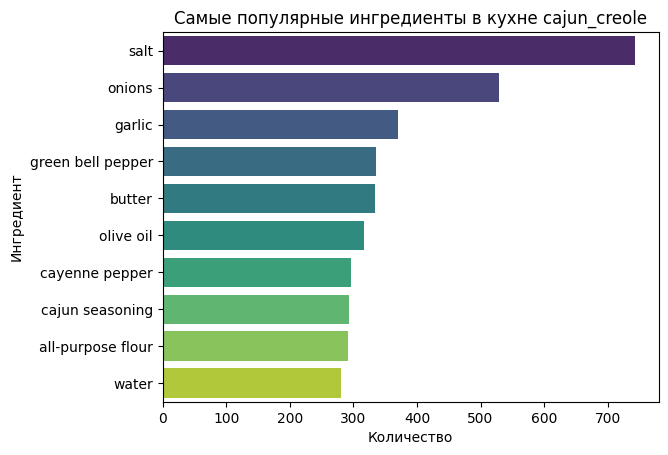

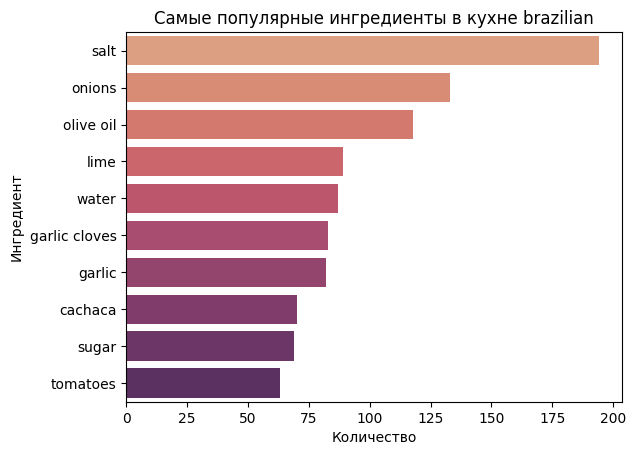

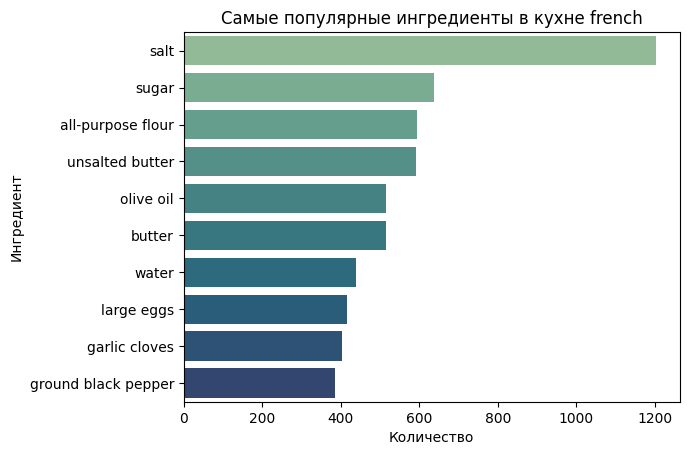

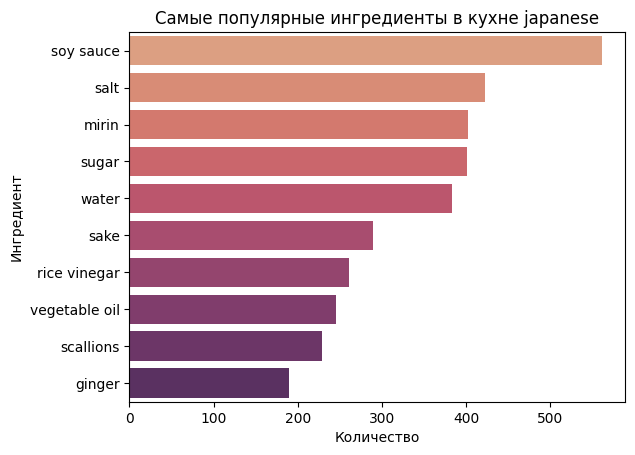

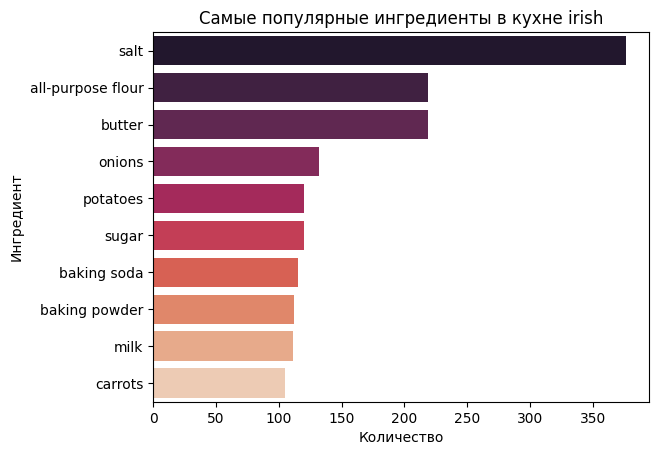

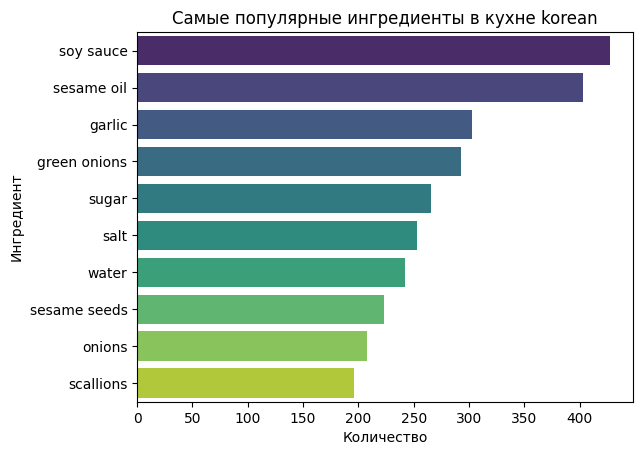

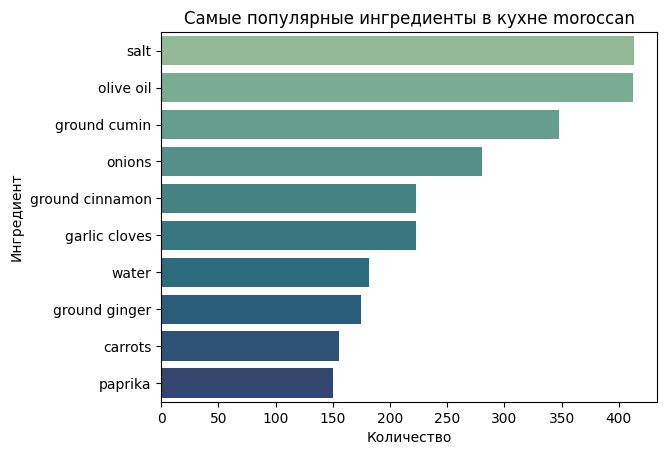

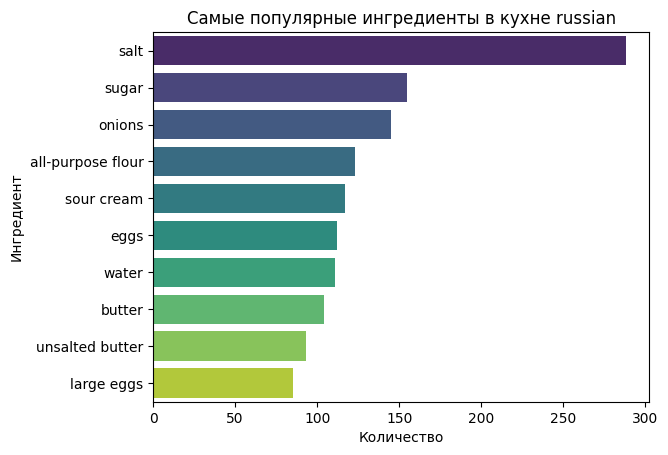

In [25]:
color_themes = ['viridis', 'rocket', 'flare', 'crest']
for cuisine_name in data['cuisine'].unique():
    country_cuisine = data[data['cuisine'] == cuisine_name]\
        .drop(columns=['cuisine', 'recipe_length'])\
        .sum(axis=0)\
        .sort_values(ascending=False)\
        .head(10)
    country_cuisine = pd.DataFrame({'ingredient': country_cuisine.index, 'count': country_cuisine.values})
    plt.title('Самые популярные ингредиенты в кухне {cuisine}'.format(cuisine=cuisine_name))
    seaborn.barplot(data=country_cuisine, x='count', y='ingredient', palette=choice(color_themes))
    plt.xlabel('Количество')
    plt.ylabel('Ингредиент')
    plt.show()

По графикам видно, что в восточных кухнях (японская, корейская, китайская) самый популярный ингредиент — соевый соус. \
В вьетнамской и тайской — рыбный соус. \
В остальных кухнях — соль.

## Разделение данных на обучающую и тестовую выборку.

In [26]:
data

,cuisine,vegetable demi-glace,blanco chees queso,"frozen chopped spinach, thawed and squeezed dry",plain breadcrumbs,cactus pad,cheddar cheese,yellow summer squash,kidney,all purpose unbleached flour,...,raspberry vinegar,five-spice powder,katsuo bushi,red bean paste,tortilla shells,condensed cream of broccoli soup,methi leaves,dried strawberries,powdered sugar icing,recipe_length
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39770,italian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
39771,irish,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
39772,chinese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


In [27]:
target = data['cuisine']
features = data.drop(columns=['cuisine', 'recipe_length'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42, stratify=target)

In [29]:
y_train.value_counts()

cuisine
italian         5251
mexican         4313
southern_us     2894
indian          2012
chinese         1791
french          1773
cajun_creole    1036
thai            1031
japanese         953
greek            787
spanish          663
korean           556
vietnamese       553
moroccan         550
british          539
filipino         506
irish            447
jamaican         352
russian          328
brazilian        313
Name: count, dtype: int64

In [30]:
y_test.value_counts()

cuisine
italian         2587
mexican         2125
southern_us     1426
indian           991
chinese          882
french           873
cajun_creole     510
thai             508
japanese         470
greek            388
spanish          326
korean           274
vietnamese       272
moroccan         271
british          265
filipino         249
irish            220
jamaican         174
russian          161
brazilian        154
Name: count, dtype: int64

Как видно, попали все классы в обучающую и тестовую выборку.\
Можно приступить к обучению модели.

## Обучение моделей

В лекциях первым алгоритмом классификации был алгоритм логистической регрессии.\
Попробуем его.

In [151]:
log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [162]:
predictions = log_reg.predict(X_test)

In [163]:
log_reg_accuracy = accuracy_score(predictions, y_test)
print('Логистическая регрессия дала результат', log_reg_accuracy, 'на тестовой выборке.')

Логистическая регрессия дала результат 0.7725125704708212 на тестовой выборке.


Также в лекциях был был алгоритм бустинга, воспользуемся библиотекой catboost.

In [31]:
boosting_classifier = CatBoostClassifier(iterations=1000)

In [32]:
boosting_classifier.fit(X_train, y_train)

Learning rate set to 0.093547
0:	learn: 2.7472045	total: 452ms	remaining: 7m 31s
1:	learn: 2.6141748	total: 726ms	remaining: 6m 2s
2:	learn: 2.5246429	total: 1.01s	remaining: 5m 36s
3:	learn: 2.4444103	total: 1.31s	remaining: 5m 25s
4:	learn: 2.3806480	total: 1.63s	remaining: 5m 23s
5:	learn: 2.3288420	total: 1.95s	remaining: 5m 23s
6:	learn: 2.2882539	total: 2.27s	remaining: 5m 22s
7:	learn: 2.2407290	total: 2.58s	remaining: 5m 20s
8:	learn: 2.2033389	total: 2.89s	remaining: 5m 18s
9:	learn: 2.1713565	total: 3.22s	remaining: 5m 18s
10:	learn: 2.1406506	total: 3.54s	remaining: 5m 18s
11:	learn: 2.1099536	total: 3.86s	remaining: 5m 17s
12:	learn: 2.0894513	total: 4.19s	remaining: 5m 18s
13:	learn: 2.0692021	total: 4.53s	remaining: 5m 18s
14:	learn: 2.0510120	total: 4.86s	remaining: 5m 18s
15:	learn: 2.0344194	total: 5.19s	remaining: 5m 19s
16:	learn: 2.0163763	total: 5.53s	remaining: 5m 19s
17:	learn: 1.9997712	total: 5.86s	remaining: 5m 19s
18:	learn: 1.9843654	total: 6.2s	remaining: 5

157:	learn: 1.3684790	total: 58s	remaining: 5m 8s
158:	learn: 1.3673443	total: 58.3s	remaining: 5m 8s
159:	learn: 1.3662011	total: 58.7s	remaining: 5m 8s
160:	learn: 1.3628681	total: 59.1s	remaining: 5m 7s
161:	learn: 1.3607029	total: 59.5s	remaining: 5m 7s
162:	learn: 1.3588595	total: 59.8s	remaining: 5m 7s
163:	learn: 1.3574284	total: 1m	remaining: 5m 6s
164:	learn: 1.3561456	total: 1m	remaining: 5m 6s
165:	learn: 1.3545817	total: 1m	remaining: 5m 6s
166:	learn: 1.3525585	total: 1m 1s	remaining: 5m 5s
167:	learn: 1.3514715	total: 1m 1s	remaining: 5m 5s
168:	learn: 1.3495581	total: 1m 2s	remaining: 5m 5s
169:	learn: 1.3486385	total: 1m 2s	remaining: 5m 4s
170:	learn: 1.3473537	total: 1m 2s	remaining: 5m 4s
171:	learn: 1.3454069	total: 1m 3s	remaining: 5m 4s
172:	learn: 1.3433711	total: 1m 3s	remaining: 5m 4s
173:	learn: 1.3418816	total: 1m 3s	remaining: 5m 3s
174:	learn: 1.3405853	total: 1m 4s	remaining: 5m 3s
175:	learn: 1.3389706	total: 1m 4s	remaining: 5m 3s
176:	learn: 1.3377301	t

311:	learn: 1.1825422	total: 1m 57s	remaining: 4m 20s
312:	learn: 1.1812875	total: 1m 58s	remaining: 4m 19s
313:	learn: 1.1806007	total: 1m 58s	remaining: 4m 19s
314:	learn: 1.1798986	total: 1m 59s	remaining: 4m 19s
315:	learn: 1.1788296	total: 1m 59s	remaining: 4m 18s
316:	learn: 1.1775865	total: 1m 59s	remaining: 4m 18s
317:	learn: 1.1770648	total: 2m	remaining: 4m 18s
318:	learn: 1.1766380	total: 2m	remaining: 4m 17s
319:	learn: 1.1758087	total: 2m 1s	remaining: 4m 17s
320:	learn: 1.1754628	total: 2m 1s	remaining: 4m 17s
321:	learn: 1.1748923	total: 2m 1s	remaining: 4m 16s
322:	learn: 1.1733513	total: 2m 2s	remaining: 4m 16s
323:	learn: 1.1725764	total: 2m 2s	remaining: 4m 15s
324:	learn: 1.1717795	total: 2m 3s	remaining: 4m 15s
325:	learn: 1.1712319	total: 2m 3s	remaining: 4m 15s
326:	learn: 1.1702582	total: 2m 3s	remaining: 4m 14s
327:	learn: 1.1697685	total: 2m 4s	remaining: 4m 14s
328:	learn: 1.1689898	total: 2m 4s	remaining: 4m 14s
329:	learn: 1.1677878	total: 2m 5s	remaining: 

464:	learn: 1.0816260	total: 2m 59s	remaining: 3m 26s
465:	learn: 1.0807992	total: 2m 59s	remaining: 3m 25s
466:	learn: 1.0801688	total: 3m	remaining: 3m 25s
467:	learn: 1.0796882	total: 3m	remaining: 3m 25s
468:	learn: 1.0794857	total: 3m	remaining: 3m 24s
469:	learn: 1.0787687	total: 3m 1s	remaining: 3m 24s
470:	learn: 1.0780559	total: 3m 1s	remaining: 3m 24s
471:	learn: 1.0778571	total: 3m 2s	remaining: 3m 23s
472:	learn: 1.0776858	total: 3m 2s	remaining: 3m 23s
473:	learn: 1.0774112	total: 3m 2s	remaining: 3m 22s
474:	learn: 1.0769268	total: 3m 3s	remaining: 3m 22s
475:	learn: 1.0761784	total: 3m 3s	remaining: 3m 22s
476:	learn: 1.0759833	total: 3m 4s	remaining: 3m 21s
477:	learn: 1.0758153	total: 3m 4s	remaining: 3m 21s
478:	learn: 1.0756279	total: 3m 4s	remaining: 3m 21s
479:	learn: 1.0754534	total: 3m 5s	remaining: 3m 20s
480:	learn: 1.0744180	total: 3m 5s	remaining: 3m 20s
481:	learn: 1.0741618	total: 3m 6s	remaining: 3m 19s
482:	learn: 1.0740326	total: 3m 6s	remaining: 3m 19s


618:	learn: 1.0213341	total: 4m 1s	remaining: 2m 28s
619:	learn: 1.0210332	total: 4m 1s	remaining: 2m 28s
620:	learn: 1.0209355	total: 4m 2s	remaining: 2m 27s
621:	learn: 1.0207167	total: 4m 2s	remaining: 2m 27s
622:	learn: 1.0204731	total: 4m 3s	remaining: 2m 27s
623:	learn: 1.0200864	total: 4m 3s	remaining: 2m 26s
624:	learn: 1.0194264	total: 4m 3s	remaining: 2m 26s
625:	learn: 1.0192549	total: 4m 4s	remaining: 2m 25s
626:	learn: 1.0187241	total: 4m 4s	remaining: 2m 25s
627:	learn: 1.0183067	total: 4m 5s	remaining: 2m 25s
628:	learn: 1.0180410	total: 4m 5s	remaining: 2m 24s
629:	learn: 1.0178877	total: 4m 5s	remaining: 2m 24s
630:	learn: 1.0173757	total: 4m 6s	remaining: 2m 24s
631:	learn: 1.0172410	total: 4m 6s	remaining: 2m 23s
632:	learn: 1.0169978	total: 4m 7s	remaining: 2m 23s
633:	learn: 1.0168122	total: 4m 7s	remaining: 2m 22s
634:	learn: 1.0163465	total: 4m 8s	remaining: 2m 22s
635:	learn: 1.0161944	total: 4m 8s	remaining: 2m 22s
636:	learn: 1.0158001	total: 4m 8s	remaining: 

772:	learn: 0.9783075	total: 5m 5s	remaining: 1m 29s
773:	learn: 0.9779576	total: 5m 5s	remaining: 1m 29s
774:	learn: 0.9778373	total: 5m 5s	remaining: 1m 28s
775:	learn: 0.9777710	total: 5m 6s	remaining: 1m 28s
776:	learn: 0.9776277	total: 5m 6s	remaining: 1m 28s
777:	learn: 0.9772831	total: 5m 7s	remaining: 1m 27s
778:	learn: 0.9771307	total: 5m 7s	remaining: 1m 27s
779:	learn: 0.9768720	total: 5m 8s	remaining: 1m 26s
780:	learn: 0.9767822	total: 5m 8s	remaining: 1m 26s
781:	learn: 0.9766929	total: 5m 8s	remaining: 1m 26s
782:	learn: 0.9764903	total: 5m 9s	remaining: 1m 25s
783:	learn: 0.9763715	total: 5m 9s	remaining: 1m 25s
784:	learn: 0.9762770	total: 5m 10s	remaining: 1m 24s
785:	learn: 0.9761858	total: 5m 10s	remaining: 1m 24s
786:	learn: 0.9760480	total: 5m 10s	remaining: 1m 24s
787:	learn: 0.9759527	total: 5m 11s	remaining: 1m 23s
788:	learn: 0.9757581	total: 5m 11s	remaining: 1m 23s
789:	learn: 0.9752180	total: 5m 12s	remaining: 1m 22s
790:	learn: 0.9751636	total: 5m 12s	rema

927:	learn: 0.9465647	total: 6m 8s	remaining: 28.6s
928:	learn: 0.9464512	total: 6m 8s	remaining: 28.2s
929:	learn: 0.9463774	total: 6m 9s	remaining: 27.8s
930:	learn: 0.9463222	total: 6m 9s	remaining: 27.4s
931:	learn: 0.9462682	total: 6m 10s	remaining: 27s
932:	learn: 0.9460898	total: 6m 10s	remaining: 26.6s
933:	learn: 0.9458078	total: 6m 10s	remaining: 26.2s
934:	learn: 0.9455290	total: 6m 11s	remaining: 25.8s
935:	learn: 0.9451062	total: 6m 11s	remaining: 25.4s
936:	learn: 0.9448560	total: 6m 12s	remaining: 25s
937:	learn: 0.9447756	total: 6m 12s	remaining: 24.6s
938:	learn: 0.9447254	total: 6m 12s	remaining: 24.2s
939:	learn: 0.9445100	total: 6m 13s	remaining: 23.8s
940:	learn: 0.9444554	total: 6m 13s	remaining: 23.4s
941:	learn: 0.9441471	total: 6m 14s	remaining: 23s
942:	learn: 0.9437559	total: 6m 14s	remaining: 22.6s
943:	learn: 0.9432744	total: 6m 14s	remaining: 22.2s
944:	learn: 0.9431413	total: 6m 15s	remaining: 21.8s
945:	learn: 0.9431066	total: 6m 15s	remaining: 21.4s
946

In [33]:
predictions = boosting_classifier.predict(X_test)

In [34]:
boosting_accuracy = accuracy_score(predictions, y_test)
print('Градиентный бустинг дал результат', boosting_accuracy, 'на тестовой выборке.')

Градиентный бустинг дал результат 0.7200213317080604 на тестовой выборке.


В лекциях также был метод K-nearest-neighboors.

In [37]:
KNN_classifier = KNeighborsClassifier(n_neighbors=20)
KNN_classifier.fit(X_train.values, y_train)
predictions = KNN_classifier.predict(X_test.values)
KNN_accuracy = accuracy_score(predictions, y_test)

In [40]:
print('Алгоритм K ближайших соседей дал результат', KNN_accuracy, 'на тестовой выборке.')

Алгоритм K ближайших соседей дал результат 0.503504494895627 на тестовой выборке.


Ещё в лекциях был алгоритм дерева решений.

In [54]:
tree_classifier = DecisionTreeClassifier(random_state=1, max_depth=200)

In [55]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=200, random_state=1)

In [56]:
predictions = tree_classifier.predict(X_test)
tree_accuracy = accuracy_score(predictions, y_test)

In [57]:
print('Алгоритм дерева решений дал результат', tree_accuracy, 'на тестовой выборке.')

Алгоритм дерева решений дал результат 0.600487581898522 на тестовой выборке.


## Выводы

После выгрузки, чтения, обработки данных, были построены 4 модели классификации.\
Наибольшую точность предсказаний дал алгоритм логистической регрессии. Логистическая регрессия дала результат 0.7725125704708212 на тестовой выборке.\
Второе место получил градиентный бустинг. Градиентный бустинг дал результат 0.7200213317080604 на тестовой выборке.\
Третье место получил алгоритм дерева решений, который дал результат 0.600487581898522 на тестовой выборке.\
И последнее место с худшим результатом получил метод K ближайших соседей с результатом 0.503504494895627.
